In [1]:
# IMPORT LIBRARIES - VIZENV ENVIRONMENT
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

In [2]:
# bring in data
data_location = Path("../Histories/joined_forexdata.csv")
df = pd.read_csv(data_location)
df.head()

,DateTime,Open,High,Low,Close,Volume
0,2020-02-02 17:00,1.10939,1.10939,1.10939,1.10939,0.0
1,2020-02-02 17:01,1.10934,1.10934,1.10921,1.10921,0.0
2,2020-02-02 17:02,1.10922,1.10922,1.10922,1.10922,0.0
3,2020-02-02 17:03,1.10923,1.10923,1.10918,1.10918,0.0
4,2020-02-02 17:04,1.10921,1.10921,1.10921,1.10921,0.0


In [3]:
# REASIGN INDEX TO DATE-TIME AND DROP EXTRA COLUMN
df.set_index(df["DateTime"], inplace = True)
df = df.drop(columns = "DateTime")
df.head()

,Open,High,Low,Close,Volume
DateTime,,,,,
2020-02-02 17:00,1.10939,1.10939,1.10939,1.10939,0.0
2020-02-02 17:01,1.10934,1.10934,1.10921,1.10921,0.0
2020-02-02 17:02,1.10922,1.10922,1.10922,1.10922,0.0
2020-02-02 17:03,1.10923,1.10923,1.10918,1.10918,0.0
2020-02-02 17:04,1.10921,1.10921,1.10921,1.10921,0.0


In [4]:
# df.index
#DROP NAs and calculate returns minute over minute
df['return'] = df['Close'].dropna().pct_change()
df.head()

,Open,High,Low,Close,Volume,return
DateTime,,,,,,
2020-02-02 17:00,1.10939,1.10939,1.10939,1.10939,0.0,NaN
2020-02-02 17:01,1.10934,1.10934,1.10921,1.10921,0.0,-0.000162
2020-02-02 17:02,1.10922,1.10922,1.10922,1.10922,0.0,0.000009
2020-02-02 17:03,1.10923,1.10923,1.10918,1.10918,0.0,-0.000036
2020-02-02 17:04,1.10921,1.10921,1.10921,1.10921,0.0,0.000027


In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
df['bollinger_mid_band'] = df['Close'].rolling(window=bollinger_window).mean()
df['bollinger_std'] = df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
df['bollinger_upper_band']  = df['bollinger_mid_band'] + (df['bollinger_std'] * 1)
df['bollinger_lower_band']  = df['bollinger_mid_band'] - (df['bollinger_std'] * 1)
# df['bollinger_lower_band']  = df['bollinger_mid_band']

# Calculate bollinger band trading signal
df['bollinger_long'] = np.where(df['Close'] < df['bollinger_lower_band'], 1.0, 0.0)
df['bollinger_short'] = np.where(df['Close'] > df['bollinger_upper_band'], -1.0, 0.0)
df['bollinger_signal'] = df['bollinger_long'] + df['bollinger_short']

df

,Open,High,Low,Close,Volume,return,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
DateTime,,,,,,,,,,,,,
2020-02-02 17:00:00,1.10939,1.10939,1.10939,1.10939,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-02-02 17:01:00,1.10934,1.10934,1.10921,1.10921,0.0,-0.000162,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-02-02 17:02:00,1.10922,1.10922,1.10922,1.10922,0.0,0.000009,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-02-02 17:03:00,1.10923,1.10923,1.10918,1.10918,0.0,-0.000036,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-02-02 17:04:00,1.10921,1.10921,1.10921,1.10921,0.0,0.000027,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20 15:54:00,1.06985,1.06993,1.06936,1.06937,0.0,-0.000449,1.069219,0.000391,1.069610,1.068828,0.0,0.0,0.0
2020-03-20 15:55:00,1.06936,1.07002,1.06936,1.06976,0.0,0.000365,1.069273,0.000386,1.069660,1.068887,0.0,-1.0,-1.0
2020-03-20 15:56:00,1.06968,1.06997,1.06968,1.06978,0.0,0.000019,1.069318,0.000390,1.069709,1.068928,0.0,-1.0,-1.0


In [7]:
df = df.dropna()
df

,Open,High,Low,Close,Volume,return,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
DateTime,,,,,,,,,,,,,
2020-02-02 17:19:00,1.10911,1.10913,1.10910,1.10910,0.0,-0.000009,1.109184,0.000061,1.109244,1.109123,1.0,0.0,1.0
2020-02-02 17:20:00,1.10909,1.10912,1.10909,1.10911,0.0,0.000009,1.109170,0.000039,1.109208,1.109131,1.0,0.0,1.0
2020-02-02 17:21:00,1.10912,1.10913,1.10909,1.10910,0.0,-0.000009,1.109164,0.000041,1.109205,1.109123,1.0,0.0,1.0
2020-02-02 17:22:00,1.10911,1.10912,1.10877,1.10883,0.0,-0.000243,1.109145,0.000083,1.109228,1.109061,1.0,0.0,1.0
2020-02-02 17:23:00,1.10884,1.10885,1.10884,1.10885,0.0,0.000018,1.109128,0.000106,1.109234,1.109022,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20 15:54:00,1.06985,1.06993,1.06936,1.06937,0.0,-0.000449,1.069219,0.000391,1.069610,1.068828,0.0,0.0,0.0
2020-03-20 15:55:00,1.06936,1.07002,1.06936,1.06976,0.0,0.000365,1.069273,0.000386,1.069660,1.068887,0.0,-1.0,-1.0
2020-03-20 15:56:00,1.06968,1.06997,1.06968,1.06978,0.0,0.000019,1.069318,0.000390,1.069709,1.068928,0.0,-1.0,-1.0


In [8]:
import matplotlib.pyplot as plt

In [9]:
df.index

DatetimeIndex(['2020-02-02 17:19:00', '2020-02-02 17:20:00',
               '2020-02-02 17:21:00', '2020-02-02 17:22:00',
               '2020-02-02 17:23:00', '2020-02-02 17:24:00',
               '2020-02-02 17:25:00', '2020-02-02 17:26:00',
               '2020-02-02 17:27:00', '2020-02-02 17:28:00',
               ...
               '2020-03-20 15:49:00', '2020-03-20 15:50:00',
               '2020-03-20 15:51:00', '2020-03-20 15:52:00',
               '2020-03-20 15:53:00', '2020-03-20 15:54:00',
               '2020-03-20 15:55:00', '2020-03-20 15:56:00',
               '2020-03-20 15:57:00', '2020-03-20 15:58:00'],
              dtype='datetime64[ns]', name='DateTime', length=50272, freq=None)

In [10]:
df2 = df.loc[: ,]['2020-03-20']

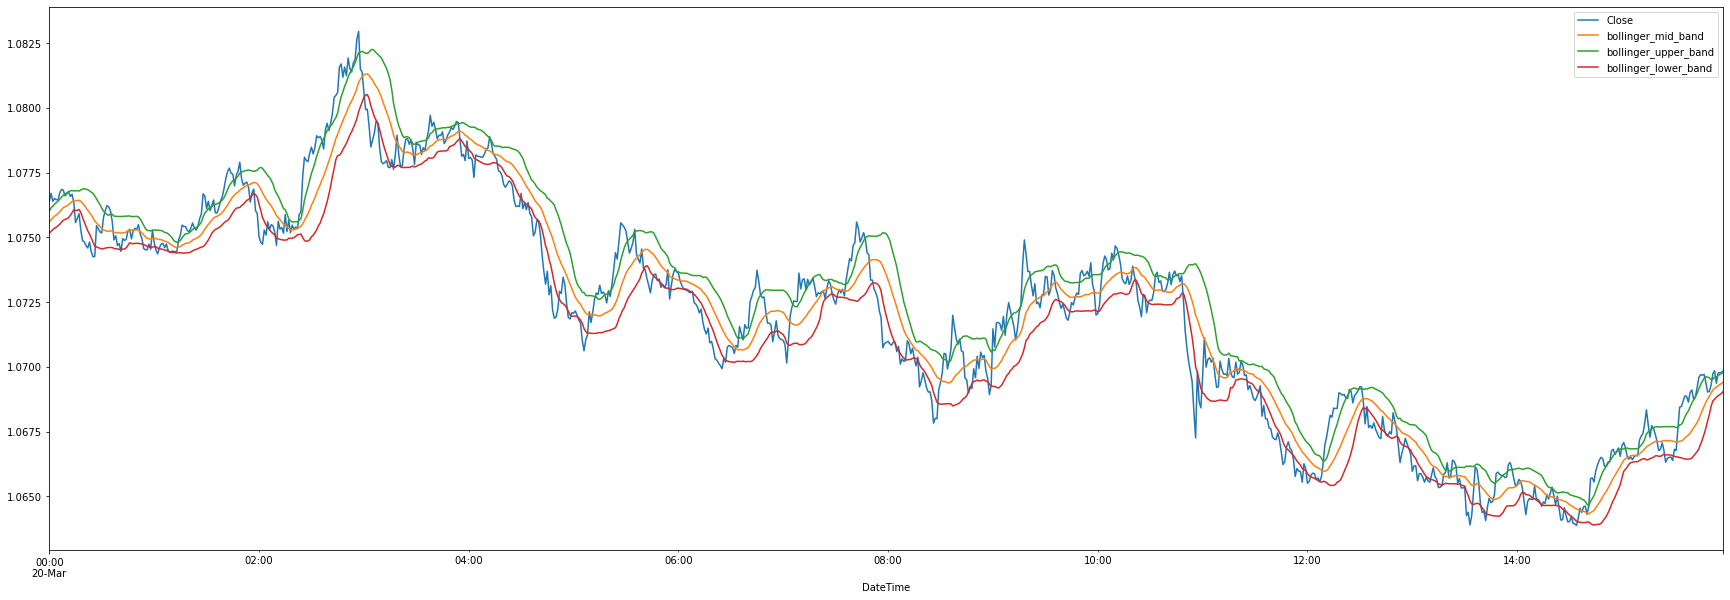

In [11]:
# df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
df2[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(30,10))

In [12]:
# # CODE STILL IN DEVELOPMENT!!! DOES NOT WORK

# for i in df.index ('2020-03-09', '2020-03-16'):
#     try:
#         x = df[(i).split()[0]].Close.values
#         pd.Series(x).plot(figsize=(20,10))
#     except:
#         pass

# # df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [13]:
# df2 = df.loc[:['Close']]['2020-03-13':'2020-03-20']

In [14]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [15]:
# Define the window size
window_size = 5

# Set the index of the feature and target columns
feature_column = 0
target_column = 0

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[1.10911 1.10909 1.10912 1.10911 1.10884]
 [1.10909 1.10912 1.10911 1.10884 1.10884]
 [1.10912 1.10911 1.10884 1.10884 1.10884]] 

y sample values:
[[1.10884]
 [1.10884]
 [1.10882]]


In [16]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split - 1]
X_test = X[split:]

y_train = y[: split - 1]
y_test = y[split:]

In [17]:
# reduce sample to 1,000

X_train = X_train[-500:]

y_train = y_train[-500:]

In [18]:
 # Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [19]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [20]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [21]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 1579
dropout_fraction = 0.30

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 4
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))  

In [22]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 1579)           9985596   
_________________________________________________________________
dropout (Dropout)            (None, 5, 1579)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 1579)           19952244  
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 1579)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 1579)           19952244  
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 1579)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1579)              1

In [24]:
# Train the model
model.fit(X_train, y_train, epochs=12, shuffle=False, batch_size=90, verbose=1)

Train on 500 samples
Epoch 1/12
500/500 [==============================] - 24s 49ms/sample - loss: 0.4853
Epoch 2/12
500/500 [==============================] - 15s 30ms/sample - loss: 0.0962
Epoch 3/12
500/500 [==============================] - 16s 32ms/sample - loss: 0.0242
Epoch 4/12
500/500 [==============================] - 14s 28ms/sample - loss: 0.0065
Epoch 5/12
500/500 [==============================] - 14s 27ms/sample - loss: 0.0091
Epoch 6/12
500/500 [==============================] - 14s 28ms/sample - loss: 0.0142
Epoch 7/12
500/500 [==============================] - 13s 25ms/sample - loss: 0.0120
Epoch 8/12
500/500 [==============================] - 14s 27ms/sample - loss: 0.0050
Epoch 9/12
500/500 [==============================] - 13s 27ms/sample - loss: 0.0013
Epoch 10/12
500/500 [==============================] - 14s 28ms/sample - loss: 0.0031
Epoch 11/12
500/500 [==============================] - 14s 28ms/sample - loss: 0.0039
Epoch 12/12
500/500 [=====================

In [25]:
 # Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.022851514673108003

In [26]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [27]:
 # Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [28]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})

# Show the DataFrame's head
stocks.head()

,Actual,Predicted
0,1.13147,1.127342
1,1.13134,1.127308
2,1.13162,1.127250
3,1.13137,1.127095
4,1.13144,1.127103


In [46]:
stocks.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [33]:
stocks.hvplot(x = 'Actual', y='Predicted', kind = 'scatter')

:Scatter   [Actual]   (Predicted)

In [36]:
# add fuller
from statsmodels.tsa.stattools import adfuller
adfuller(df.Close)

(-0.7758404813935658,
 0.8261159472669541,
 57,
 50214,
 {'1%': -3.430480235279419,
  '5%': -2.861597561324232,
  '10%': -2.566800637988222},
 -702686.3245058439)

In [44]:
df.head()

,Open,High,Low,Close,Volume,return,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Diff
DateTime,,,,,,,,,,,,,,
2020-02-02 17:19:00,1.10911,1.10913,1.10910,1.10910,0.0,-0.000009,1.109184,0.000061,1.109244,1.109123,1.0,0.0,1.0,NaN
2020-02-02 17:20:00,1.10909,1.10912,1.10909,1.10911,0.0,0.000009,1.109170,0.000039,1.109208,1.109131,1.0,0.0,1.0,0.00001
2020-02-02 17:21:00,1.10912,1.10913,1.10909,1.10910,0.0,-0.000009,1.109164,0.000041,1.109205,1.109123,1.0,0.0,1.0,-0.00001
2020-02-02 17:22:00,1.10911,1.10912,1.10877,1.10883,0.0,-0.000243,1.109145,0.000083,1.109228,1.109061,1.0,0.0,1.0,-0.00027
2020-02-02 17:23:00,1.10884,1.10885,1.10884,1.10885,0.0,0.000018,1.109128,0.000106,1.109234,1.109022,1.0,0.0,1.0,0.00002


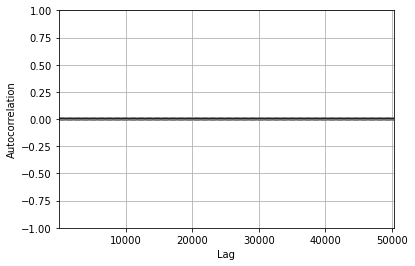

In [45]:
# autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Diff)

In [37]:
# !pip install statsmodels

In [41]:
df['Diff'] = df.Close.diff()